# Examples showcasing GEM EO data collections

This is a notebook showcasing workflow examples for downloading EO imaging data from data collections available through Sentinel Hub.

### Data download examples in this notebook:

1.  Sentinel-2 L1C 
2.  Sentinel-2 L2A 
3.  Sentinel-1 
4.  Sentinel-3 OLCI L1B 
5.  Sentinel-3 SLSTR L1B 
6.  Sentinel-5P L2 
7.  Landsat 1-5 MSS L1 
8.  Landsat 4-5 TM L1 
9.  Landsat 4-5 TM L2 
10. Landsat 7 ETM+ L1 
11. Landsat 7 ETM+ L2
12. Landsat - 8 L1
13. Landsat - 8 L2
14. Harmonized Landsat Sentinel-2
15. Digital Elevation Model (DEM) 



In [1]:
%matplotlib inline
import datetime

from eolearn.core import FeatureType
from eolearn.io import SentinelHubDemTask, SentinelHubInputTask
from eolearn.visualization import PlotConfig
from sentinelhub import CRS, BBox, DataCollection

### General parameters

In [2]:
# region of interest
roi_bbox = BBox(bbox=[5.60, 52.68, 5.75, 52.63], crs=CRS.WGS84)
large_bbox = BBox(bbox=[-10.524902, 33.651208, 11.711426, 44.213710], crs=CRS.WGS84)
coast_bbox = BBox(bbox=[-0.05, 40.23, 0.61, 40.63], crs=CRS.WGS84)

# configure the plotting
plot_config = PlotConfig(subplot_width=10, subplot_height=10, rgb_factor=2.5, show_title=False)

### 1. [Sentinel-2 L1C](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l1c/)

In [3]:
s2_l1c_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L1C,
    bands_feature=(FeatureType.DATA, "L1C_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
    max_threads=3,
)

In [4]:
eopatch_s2_l1c = s2_l1c_task.execute(bbox=roi_bbox, time_interval=["2022-07-03", "2022-07-05"])

In [5]:
eopatch_s2_l1c.timestamp

[datetime.datetime(2022, 7, 4, 10, 56, 28)]

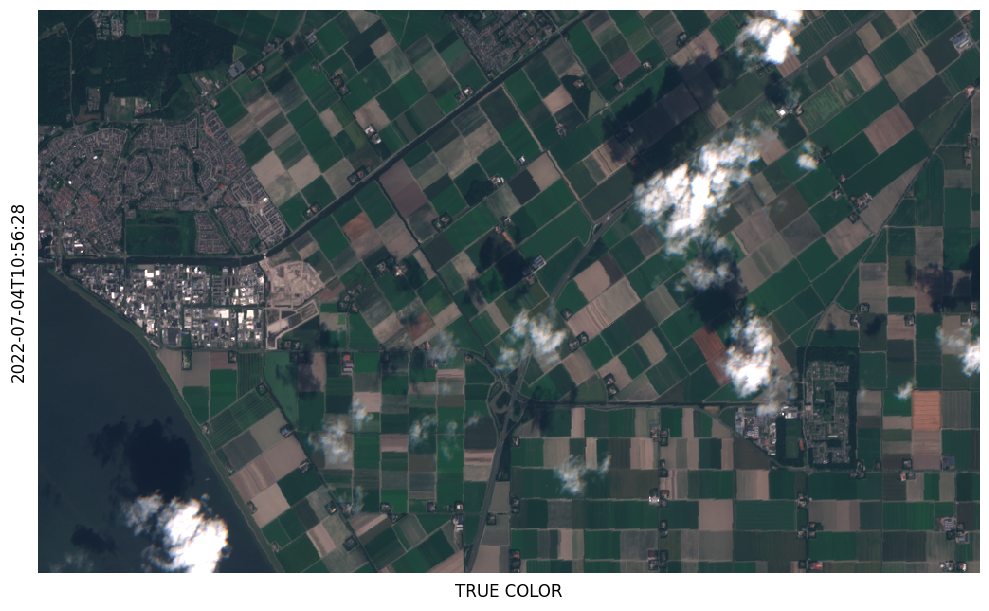

In [6]:
eopatch_s2_l1c.plot(
    (FeatureType.DATA, "L1C_data"), times=[0], rgb=[3, 2, 1], channel_names=["TRUE COLOR"], config=plot_config
);

### 2. [Sentinel-2 L2A](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/)


In [7]:
s2_l2a_data = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L2A,
    bands_feature=(FeatureType.DATA, "L2A_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [8]:
eopatch_s2_l2a = s2_l2a_data.execute(bbox=roi_bbox, time_interval=["2022-07-03", "2022-07-05"])

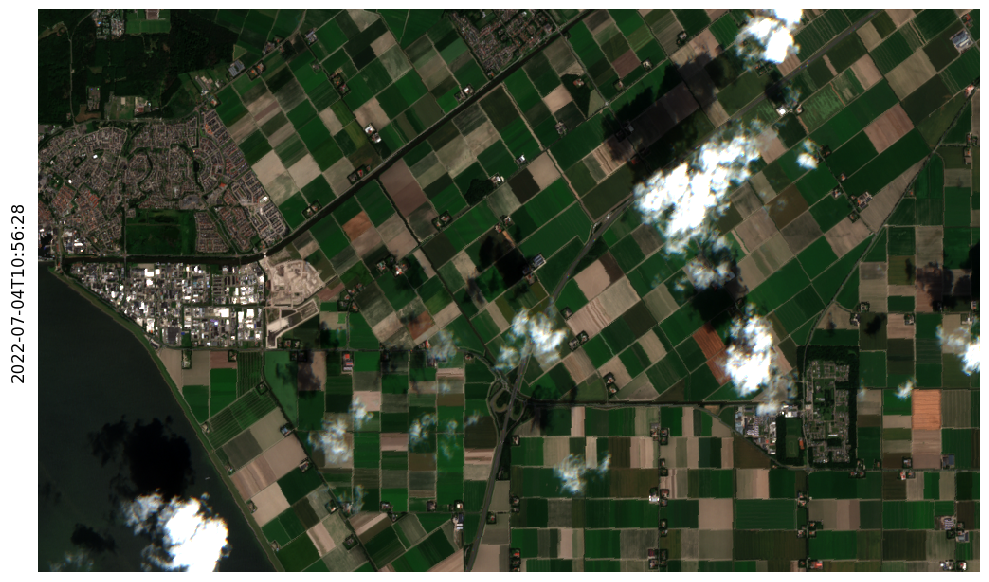

In [9]:
eopatch_s2_l2a.plot((FeatureType.DATA, "L2A_data"), rgb=[3, 2, 1], config=plot_config);

### 3. [Sentinel-1](https://docs.sentinel-hub.com/api/latest/data/sentinel-1-grd/)


In [10]:
s1_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL1_IW_ASC,
    bands=["VV", "VH"],
    bands_feature=(FeatureType.DATA, "S1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=10,
    time_difference=datetime.timedelta(hours=2),
)

In [11]:
s1_bbox = BBox(bbox=[10.48, 45.14, 10.52, 45.16], crs=CRS.WGS84)

eopatch_s1 = s1_task.execute(bbox=s1_bbox, time_interval=["2016-07-12", "2016-07-16"])

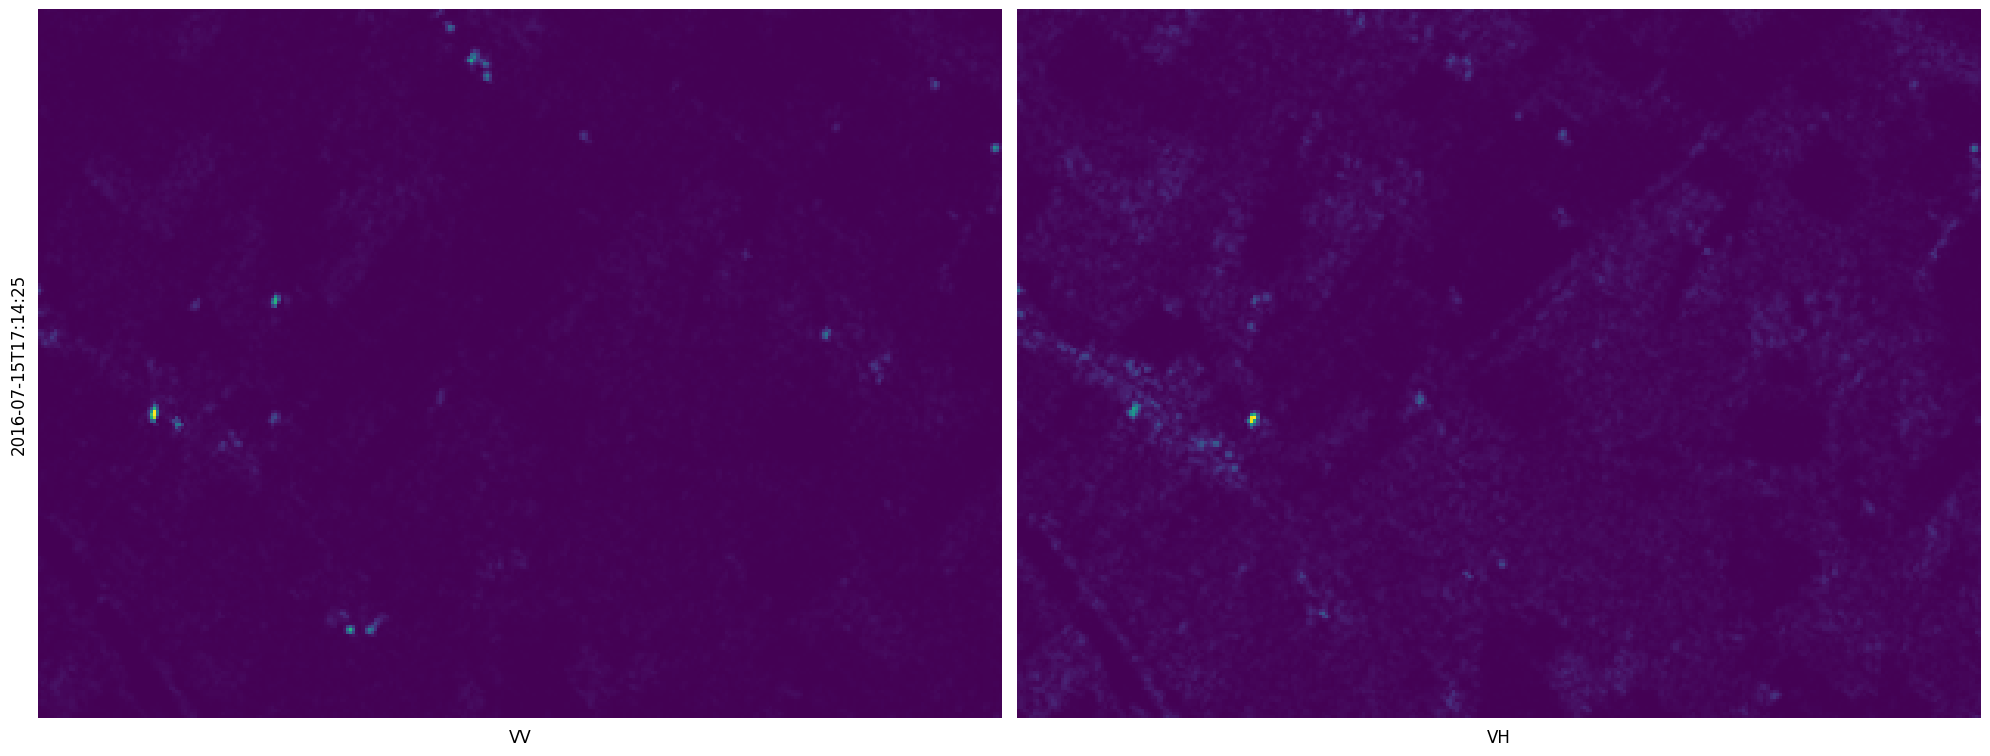

In [12]:
eopatch_s1.plot((FeatureType.DATA, "S1_data"), channels=[0, 1], channel_names=["VV", "VH"], config=plot_config);

### 4. [Sentinel-3 OLCI L1B](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-olci-l1b/) 

In [13]:
s3_olci_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL3_OLCI,
    bands=["B02", "B03", "B04", "B05", "B06", "B08", "B19", "B21"],
    bands_feature=(FeatureType.DATA, "S3_OLCI_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=100,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [14]:
eopatch_s3_olci = s3_olci_task.execute(bbox=coast_bbox, time_interval=["2022-07-03", "2022-07-05"])

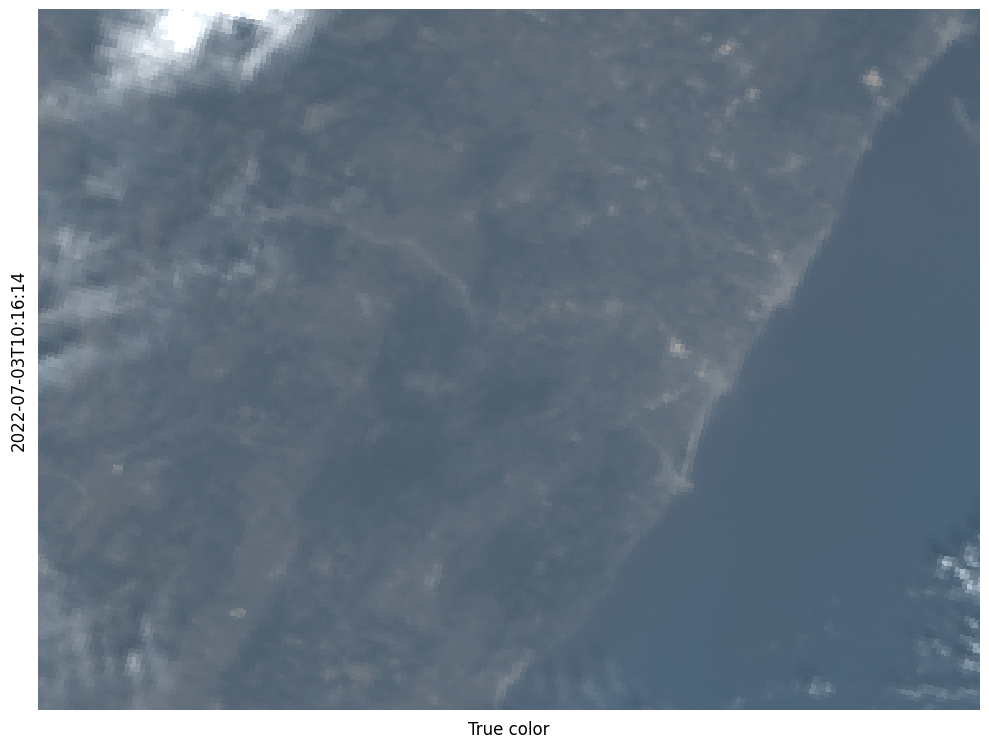

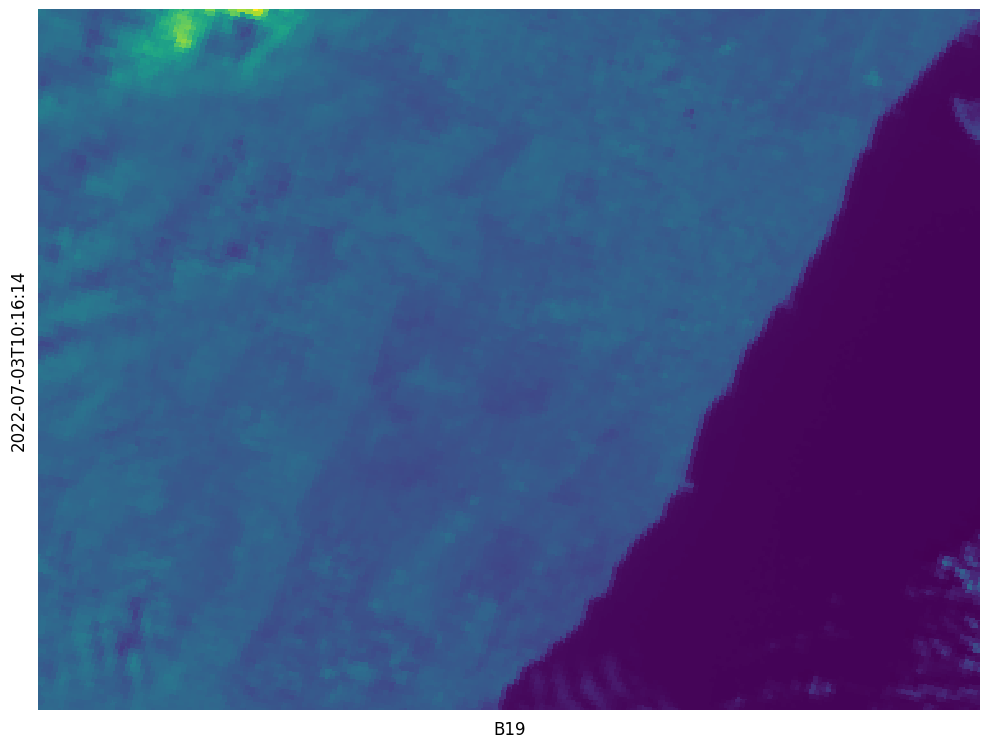

In [15]:
eopatch_s3_olci.plot(
    (FeatureType.DATA, "S3_OLCI_data"), times=[0], rgb=[2, 1, 0], channel_names=["True color"], config=plot_config
)

eopatch_s3_olci.plot(
    (FeatureType.DATA, "S3_OLCI_data"), times=[0], channels=[6], channel_names=["B19"], config=plot_config
);

 ### 5. [Sentinel-3 SLSTR L1B](https://docs.sentinel-hub.com/api/latest/data/sentinel-3-slstr-l1b/)

In [16]:
s3_slstr_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL3_SLSTR,
    bands=["S6"],
    bands_feature=(FeatureType.DATA, "S3_SLSTR_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=100,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [17]:
eopatch_s3_slstr = s3_slstr_task.execute(bbox=coast_bbox, time_interval=["2022-07-03", "2022-07-05"])

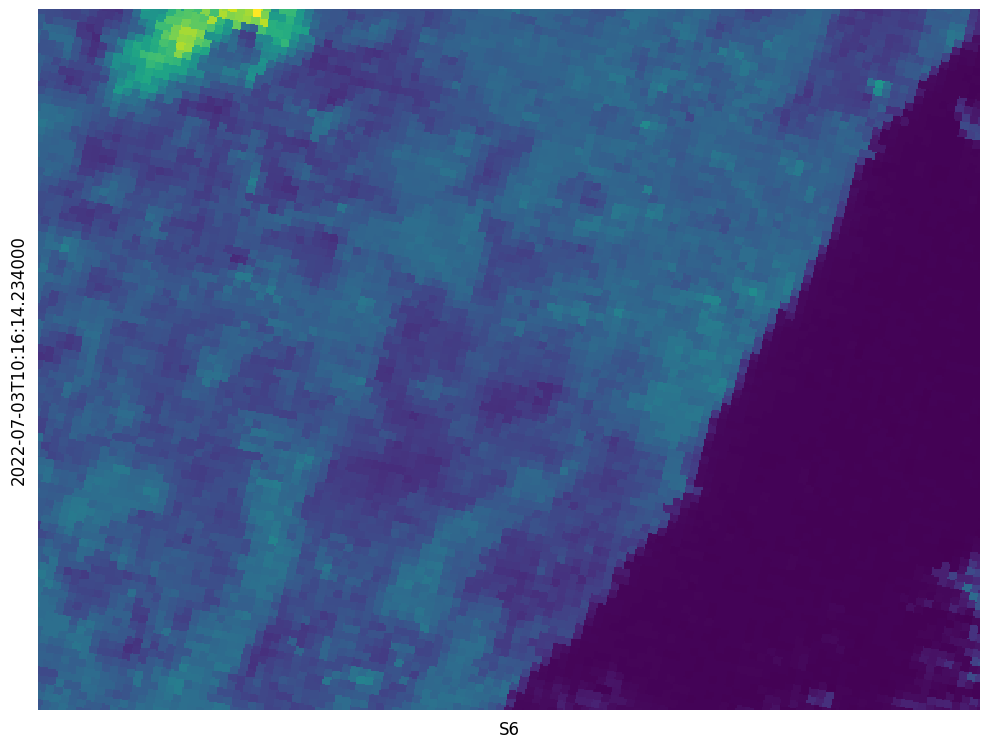

In [18]:
eopatch_s3_slstr.plot(
    (FeatureType.DATA, "S3_SLSTR_data"), times=[0], channels=[0], channel_names=["S6"], config=plot_config
);

### 6. [Sentinel-5P L2](https://docs.sentinel-hub.com/api/latest/data/sentinel-5p-l2/)

In [19]:
s5p_l2_data = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL5P,
    bands=["CO"],
    bands_feature=(FeatureType.DATA, "CO"),
    resolution=1000,
    time_difference=datetime.timedelta(hours=2),
    aux_request_args={"timeliness": "NRTI"},
)

In [20]:
eopatch_5p_l2 = s5p_l2_data.execute(bbox=large_bbox, time_interval=["2020-07-10", "2020-07-10"])

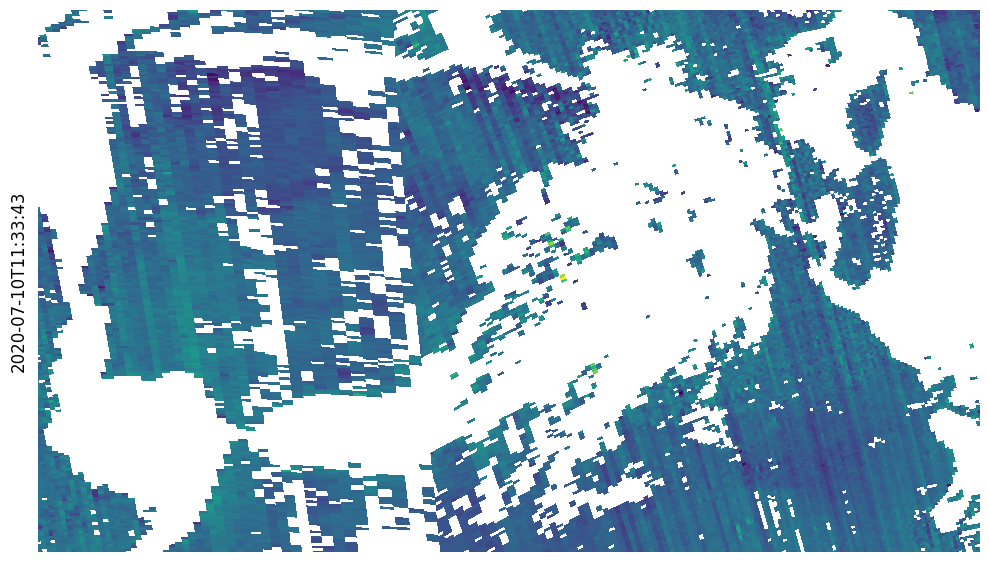

In [21]:
eopatch_5p_l2.plot((FeatureType.DATA, "CO"), times=[0], config=plot_config);

### 7. [Landsat 1-5 MSS L1](https://collections.sentinel-hub.com/landsat-1-5-mss-l1/)

In [22]:
landsat_mssl1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_MSS_L1,
    bands=["B01", "B02", "B03", "B04"],
    bands_feature=(FeatureType.DATA, "LANDSAT_MSS_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=60,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [23]:
eopatch_landsat_mssl1 = landsat_mssl1_task.execute(bbox=coast_bbox, time_interval=["1975-09-10", "1975-09-20"])

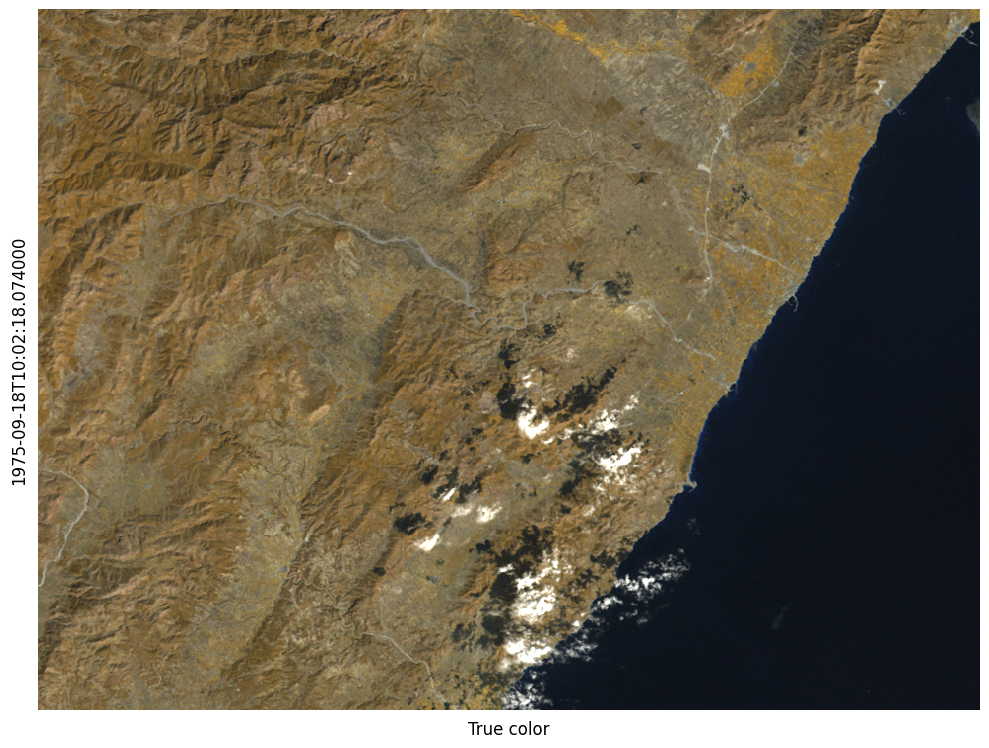

In [24]:
eopatch_landsat_mssl1.plot(
    (FeatureType.DATA, "LANDSAT_MSS_L1_data"),
    rgb=[3, 2, 1],
    channel_names=["True color"],
    times=[1],
    config=plot_config,
);

### 8. [Landsat 4-5 TM L1](https://collections.sentinel-hub.com/landsat-4-5-tm-l1/)

In [25]:
landsat_tml1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_TM_L1,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_TM_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [26]:
eopatch_landsat_tml1 = landsat_tml1_task.execute(bbox=roi_bbox, time_interval=["1985-08-05", "1985-08-10"])

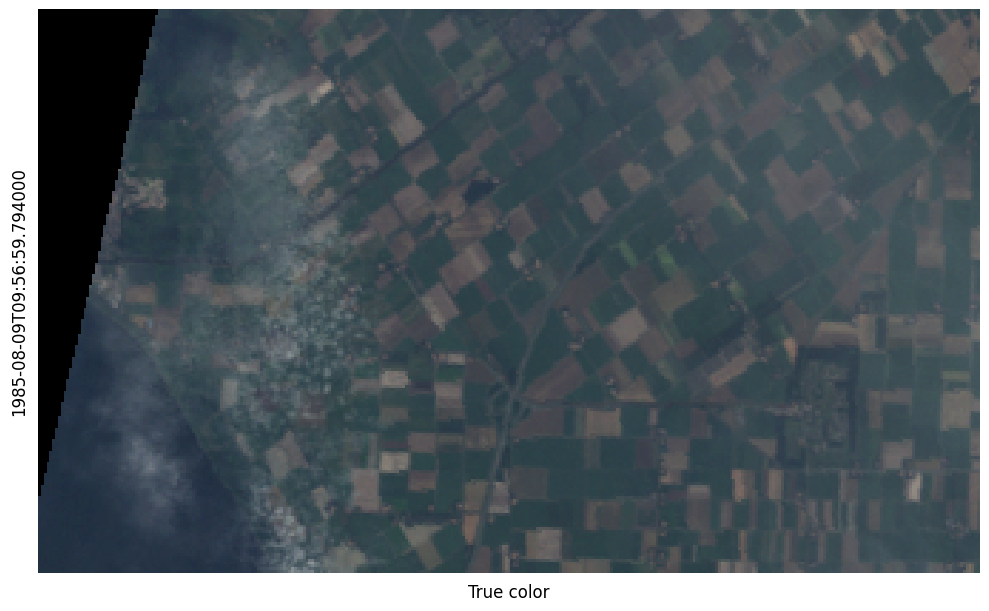

In [27]:
eopatch_landsat_tml1.plot(
    (FeatureType.DATA, "LANDSAT_TM_L1_data"), rgb=[2, 1, 0], channel_names=["True color"], times=[0], config=plot_config
);

### 9. [Landsat 4-5 TM L2](https://collections.sentinel-hub.com/landsat-4-5-tm-l2/)

In [28]:
landsat_tml2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_TM_L2,
    bands=["B01", "B02", "B03", "B04", "B05", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_TM_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [29]:
eopatch_landsat_tml2 = landsat_tml2_task.execute(bbox=roi_bbox, time_interval=["1990-07-01", "1990-07-15"])

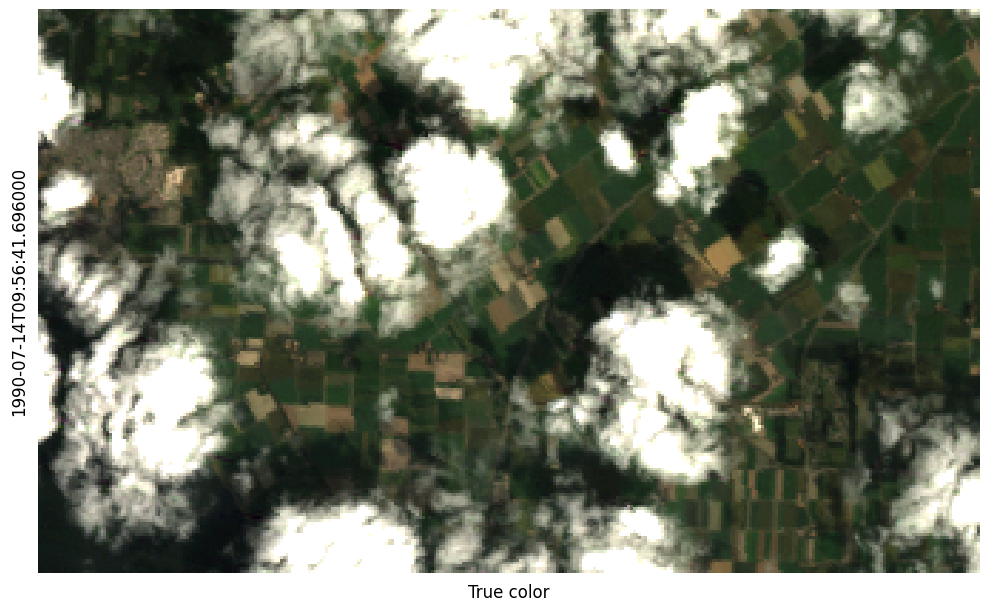

In [30]:
eopatch_landsat_tml2.plot(
    (FeatureType.DATA, "LANDSAT_TM_L2_data"), rgb=[2, 1, 0], channel_names=["True color"], times=[1], config=plot_config
);

### 10. [Landsat 7 ETM+ L1](https://collections.sentinel-hub.com/landsat-7-etm+-l1/)

In [31]:
landsat_etml1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_ETM_L1,
    bands=["B01", "B02", "B03", "B04", "B05", "B06_VCID_1"],
    bands_feature=(FeatureType.DATA, "LANDSAT_ETM_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [32]:
eopatch_landsat_etml1 = landsat_etml1_task.execute(bbox=roi_bbox, time_interval=["2002-08-10", "2002-08-30"])

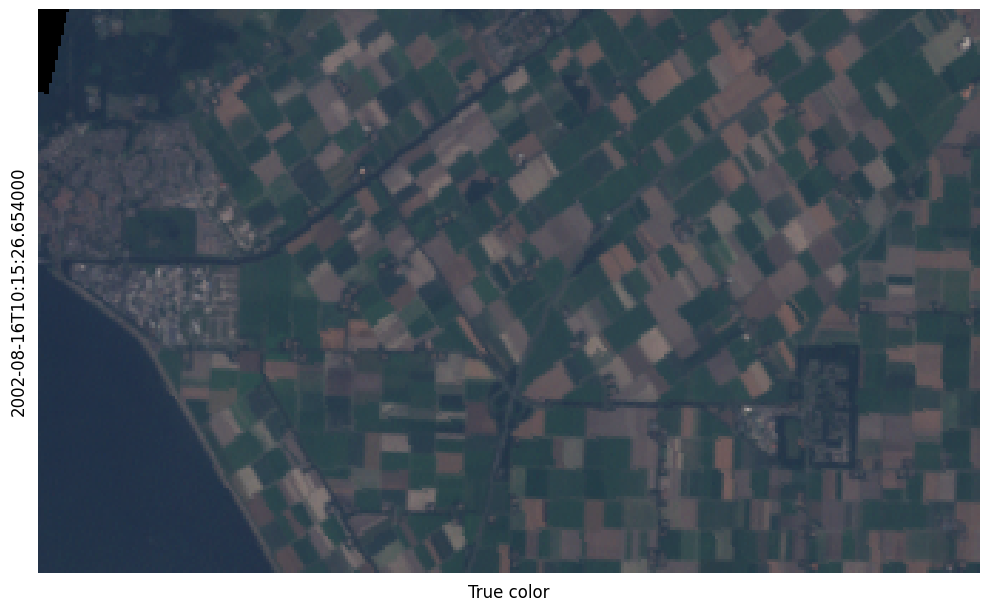

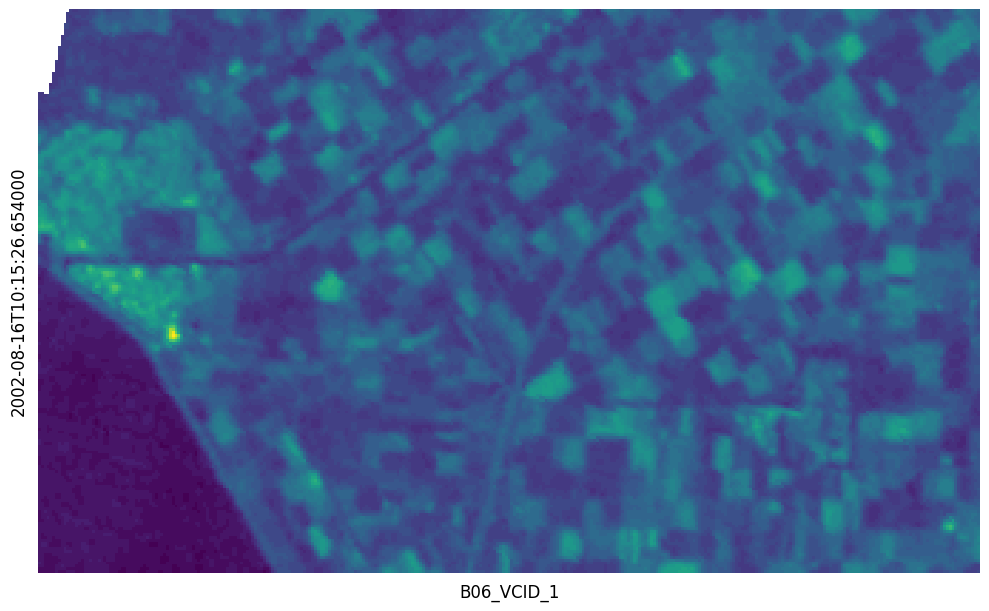

In [33]:
eopatch_landsat_etml1.plot(
    (FeatureType.DATA, "LANDSAT_ETM_L1_data"),
    rgb=[2, 1, 0],
    channel_names=["True color"],
    times=[0],
    config=plot_config,
)

eopatch_landsat_etml1.plot(
    (FeatureType.DATA, "LANDSAT_ETM_L1_data"), channels=[5], channel_names=["B06_VCID_1"], times=[0], config=plot_config
);

### 11.[Landsat 7 ETM+ L2](https://collections.sentinel-hub.com/landsat-7-etm+-l2/)

In [34]:
landsat_etml2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_ETM_L2,
    bands=["B01", "B02", "B03", "B04", "B06", "B07"],
    bands_feature=(FeatureType.DATA, "LANDSAT_ETM_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [35]:
eopatch_landsat_etml2 = landsat_etml2_task.execute(bbox=roi_bbox, time_interval=["2002-08-10", "2002-08-30"])

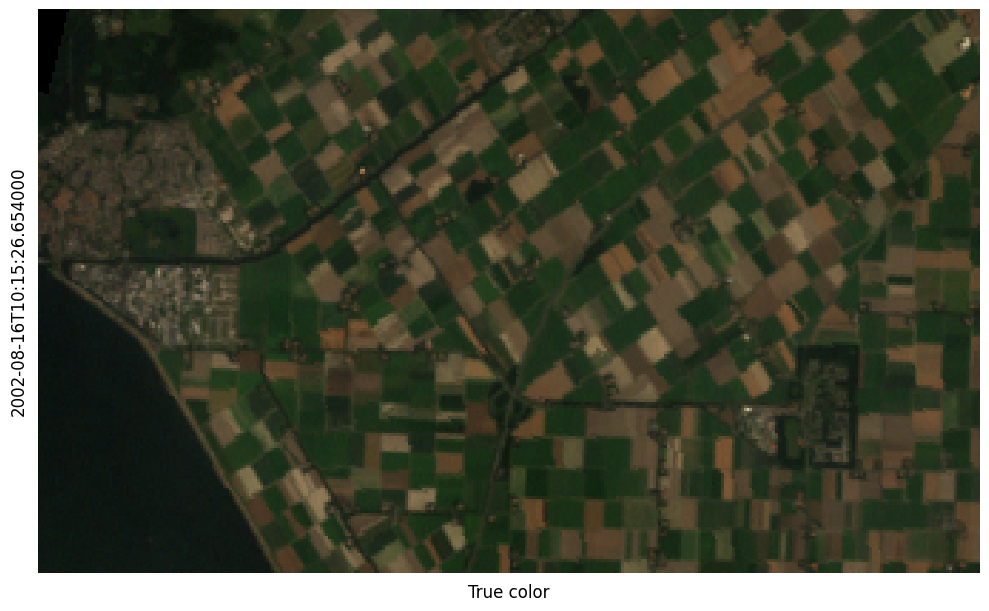

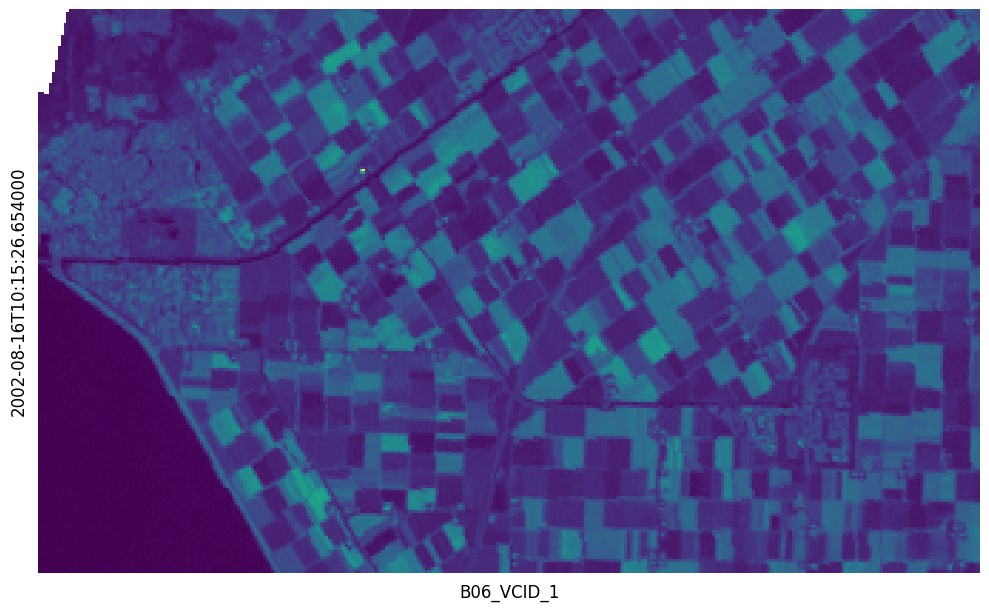

In [36]:
eopatch_landsat_etml2.plot(
    (FeatureType.DATA, "LANDSAT_ETM_L2_data"),
    rgb=[2, 1, 0],
    channel_names=["True color"],
    times=[0],
    config=plot_config,
)

eopatch_landsat_etml2.plot(
    (FeatureType.DATA, "LANDSAT_ETM_L2_data"), channels=[5], channel_names=["B06_VCID_1"], times=[0], config=plot_config
);

### 12. [Landsat - 8 L1](https://collections.sentinel-hub.com/landsat-8-l1/)

In [37]:
landsat_otl1_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_OT_L1,
    bands=["B01", "B02", "B03", "B04", "B06", "B10"],
    bands_feature=(FeatureType.DATA, "LANDSAT_OT_L1_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [38]:
eopatch_landsat_otl1 = landsat_otl1_task.execute(bbox=roi_bbox, time_interval=["2016-07-10", "2016-07-20"])

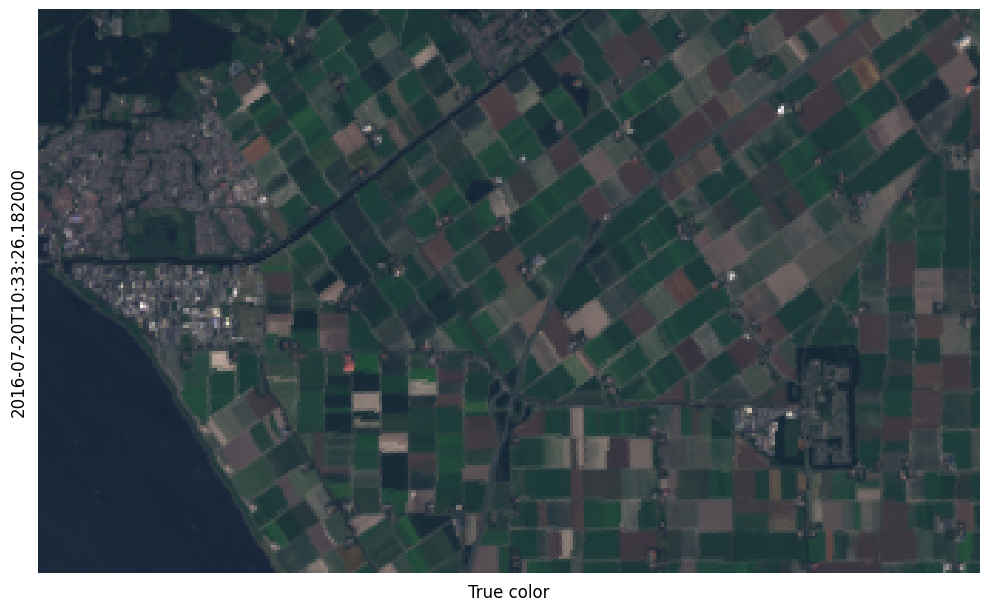

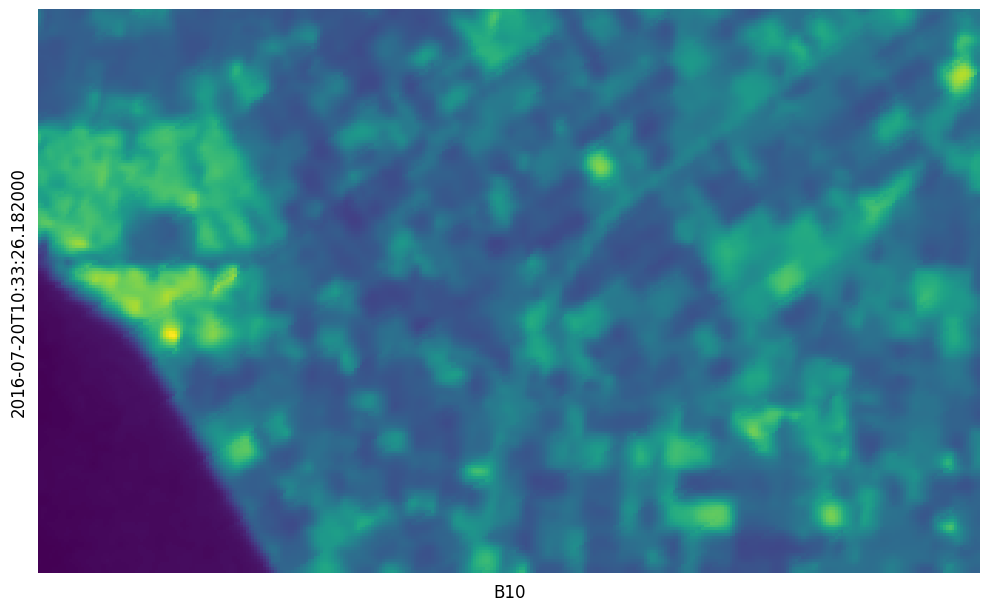

In [39]:
eopatch_landsat_otl1.plot(
    (FeatureType.DATA, "LANDSAT_OT_L1_data"), rgb=[3, 2, 1], channel_names=["True color"], times=[0], config=plot_config
)

eopatch_landsat_otl1.plot(
    (FeatureType.DATA, "LANDSAT_OT_L1_data"), channels=[5], channel_names=["B10"], times=[0], config=plot_config
);

### 13. [Landsat 8-9 OLI-TIRS Level 2](https://collections.sentinel-hub.com/landsat-8-l2/)

In [40]:
landsat_otl2_task = SentinelHubInputTask(
    data_collection=DataCollection.LANDSAT_OT_L2,
    bands=["B01", "B02", "B03", "B04", "B05", "B10"],
    bands_feature=(FeatureType.DATA, "LANDSAT_OT_L2_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.8,
    time_difference=datetime.timedelta(hours=2),
)

In [41]:
eopatch_landsat_otl2 = landsat_otl2_task.execute(bbox=roi_bbox, time_interval=["2016-07-10", "2016-07-20"])

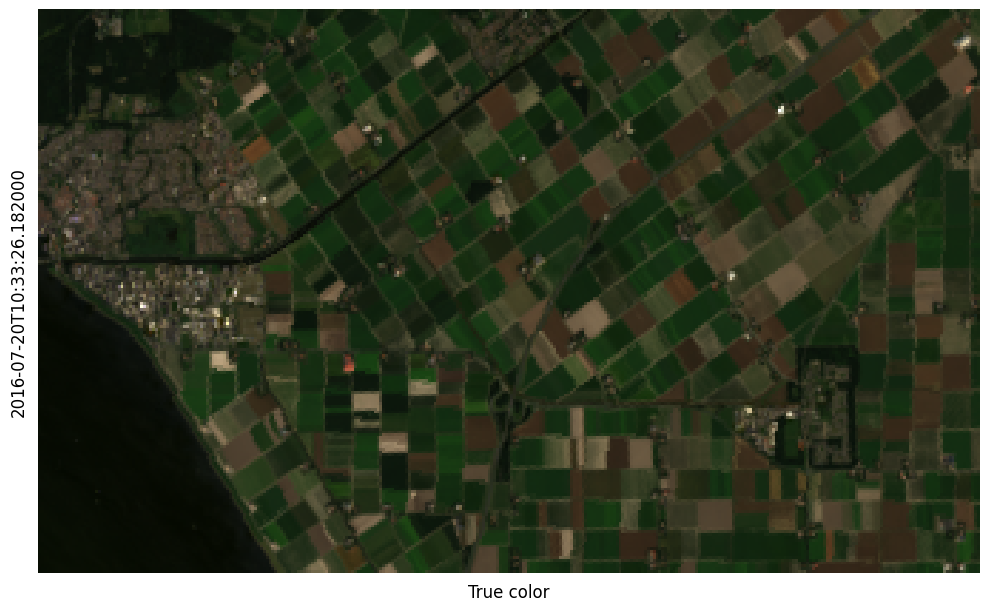

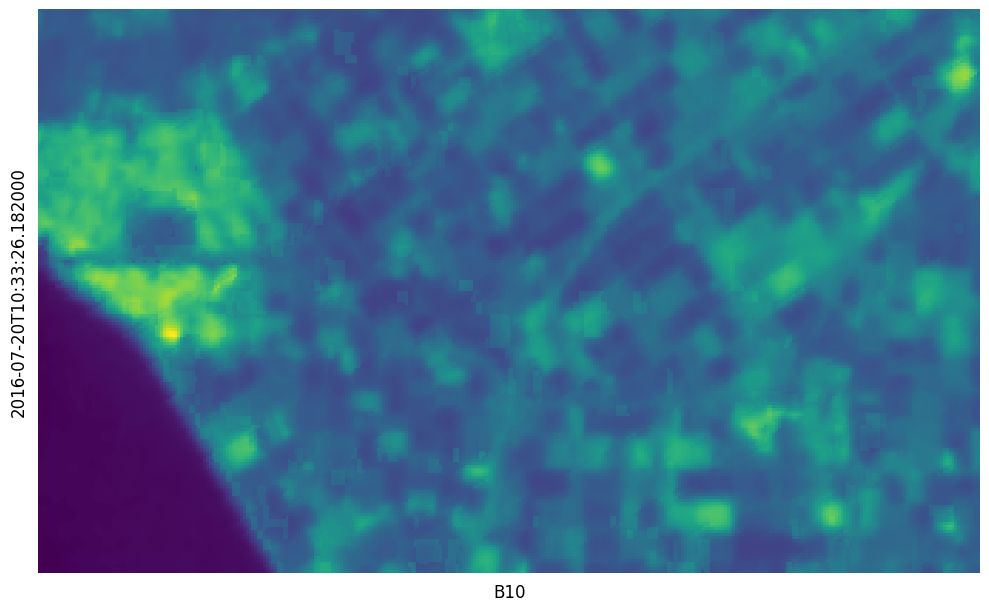

In [42]:
eopatch_landsat_otl2.plot(
    (FeatureType.DATA, "LANDSAT_OT_L2_data"), rgb=[3, 2, 1], channel_names=["True color"], times=[0], config=plot_config
)

eopatch_landsat_otl2.plot(
    (FeatureType.DATA, "LANDSAT_OT_L2_data"), channels=[5], channel_names=["B10"], times=[0], config=plot_config
);

### 14. [Harmonized Landsat Sentinel-2](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/harmonized-landsat-sentinel-2-hls-overview/)

In [44]:
harmonized_landsat_sentinel_task = SentinelHubInputTask(
    data_collection=DataCollection.HARMONIZED_LANDSAT_SENTINEL,
    bands=["CoastalAerosol", "Blue", "Green", "Red", "ThermalInfrared1"],
    bands_feature=(FeatureType.DATA, "HARMONIZED_LANDSAT_SENTINEL_data"),
    additional_data=[(FeatureType.MASK, "dataMask")],
    resolution=30,
    maxcc=0.3,
)

In [45]:
eopatch_harmonized_landsat_sentinel = harmonized_landsat_sentinel_task.execute(
    bbox=roi_bbox, time_interval=["2016-07-10", "2016-07-20"]
)

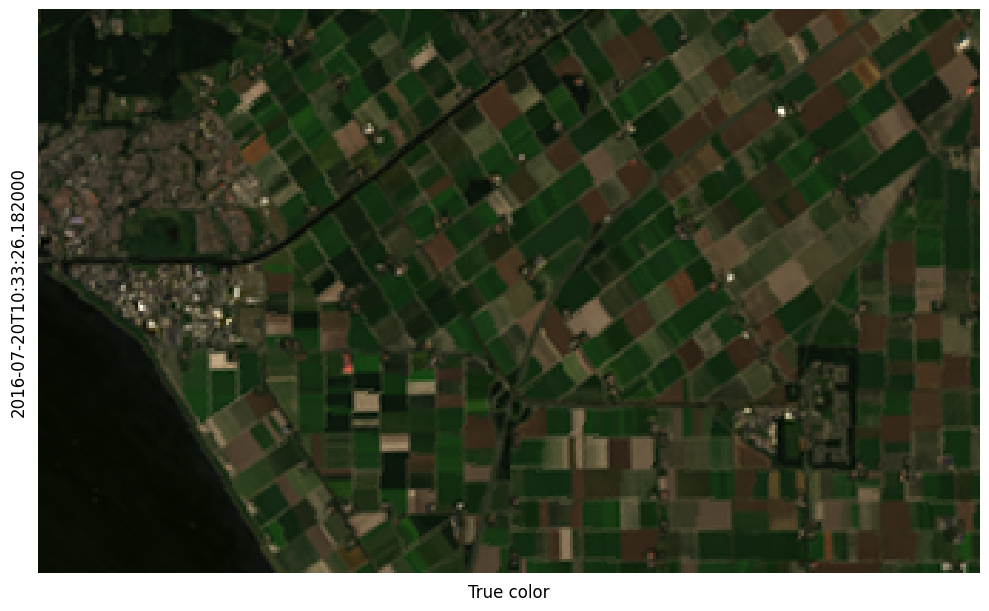

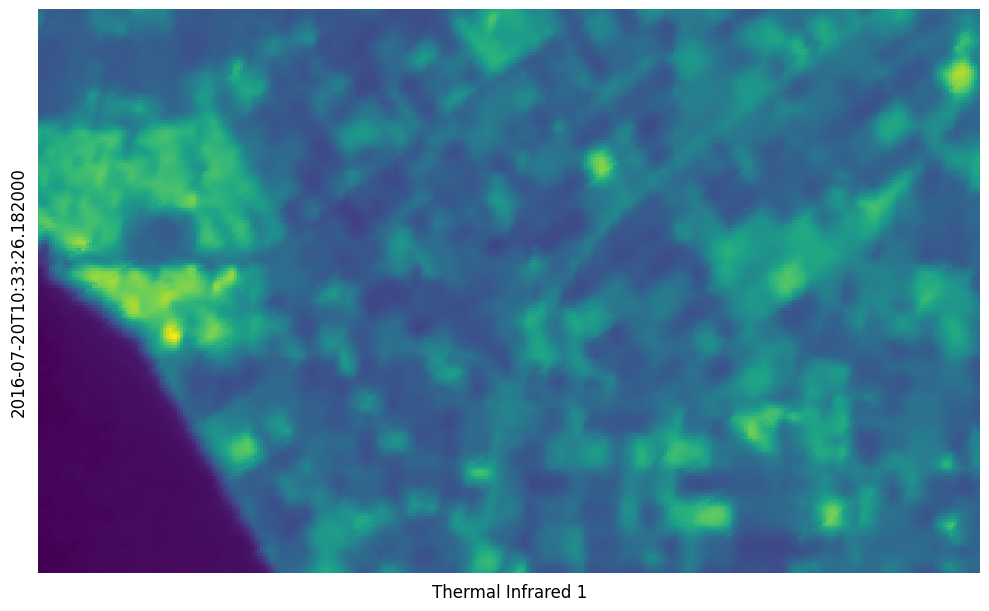

In [46]:
eopatch_harmonized_landsat_sentinel.plot(
    (FeatureType.DATA, "HARMONIZED_LANDSAT_SENTINEL_data"),
    rgb=[3, 2, 1],
    channel_names=["True color"],
    times=[0],
    config=plot_config,
)

eopatch_harmonized_landsat_sentinel.plot(
    (FeatureType.DATA, "HARMONIZED_LANDSAT_SENTINEL_data"),
    channels=[4],
    channel_names=["Thermal Infrared 1"],
    times=[0],
    config=plot_config,
);

### 15. [Digital Elevation Model](https://docs.sentinel-hub.com/api/latest/data/dem/)

In [43]:
dem_task = SentinelHubDemTask(data_collection=DataCollection.DEM_COPERNICUS_30, resolution=90)

In [44]:
eopatch_dem = dem_task.execute(bbox=coast_bbox)

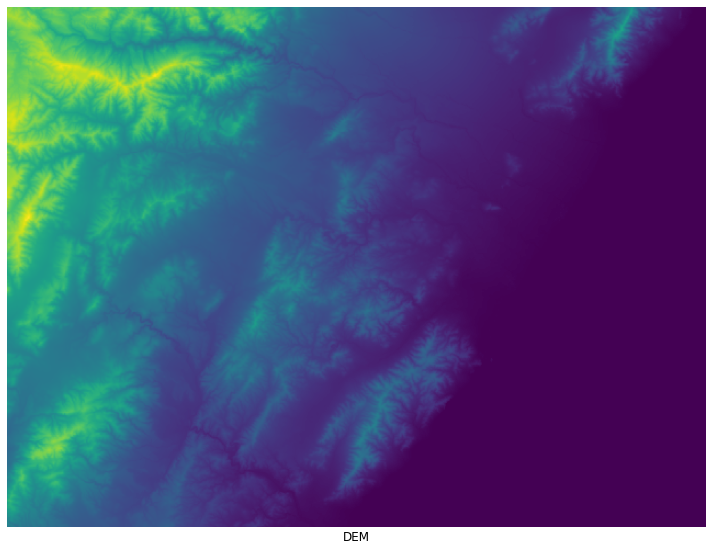

In [45]:
eopatch_dem.plot((FeatureType.DATA_TIMELESS, "dem"), channel_names=["DEM"], config=plot_config);